In this example we reduce the data for a delay scan using the time tool, stack two runs, load the stacked data, separate the isotropic and anisotropic components, and plot them. 

# inputs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio
from scipy.optimize import curve_fit


from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *
from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *
from LCLSDataToolsNew.StackFns import *
from LCLSDataToolsNew.IRFtools import *
from LCLSDataToolsNew.plottingTools import *

print('Import Complete!')

exper = 'xcsl1008621'

### s3df ###
smalldata_folder='/sdf/data/lcls/ds/xcs/'+exper+'/hdf5/smalldata/'

## set output path as desired
outpath='/sdf/data/lcls/ds/xcs/'+exper+'/results/ReducedData/'

# #make directories if needed 
if os.path.isdir(outpath+'/figures/')==False:
    os.makedirs(outpath+'/figures/')
if os.path.isdir(outpath+'/npy/')==False:
    os.makedirs(outpath+'/npy/')


Import Complete!


## set up varDict

In [2]:
varDict = {
        'ipm4'          : 'ipm4/sum',
        'ipm5'          : 'ipm5/sum',
        'xray_status'   : 'lightStatus/xray',
        'laser_status'  : 'lightStatus/laser',
        'ebeam_hv'      : 'ebeam/photon_energy',
        'scan_vec'      : 'scan/var0',
        'laser_diode'   : '/diodeGon/channels/',
    
        ## tt variables
        'ttCorr'        : 'tt/ttCorr',
        'ttAMPL'        : 'tt/AMPL',
        'ttFWHM'        : 'tt/FLTPOSFWHM',
        'ttFLTPOS'      : 'tt/FLTPOS',
        'encoder'       : 'enc/lasDelay',
        'lxt'           : 'epics/lxt' , 

        
        ## scattering variables
        'azav'      : 'epix10k2M/azav_azav',
        'qs'        : 'UserDataCfg/epix10k2M/azav__azav_q',
        'phis'      :  'UserDataCfg/epix10k2M/azav__azav_phiVec',


        }

## set up paramDict

In [3]:
setbins=np.arange(-0.4e-12,1.3e-12,.02e-12)


paramDict= {
        'binSetup'  : 'fixed',
        'binSet2'   : setbins,
        'binMethod' : 'ave', 
        'qnorm'     : (3,3.5), 
        'qrange'    : (0.5,3.5),
        'show_filters'  : True, #show filter plots
        'useAzav_std'  : False, 
        'azav_percent_filter' : None, 
        'ipm'    : 5, # select ipm to use for I0
        'corr_filter' : True,
        'corr_threshold': .05 , #threshold as fraction
        'ipm_filter' : (10000,None), #set limits for ipm intensity
        'Iscat_threshold'  : 100, #lower limit for Iscat
    
        'use_TT'   :  True,  
        'scan_var' : None,
        'x_var'   : None,
    
        't0_corr' : None,  #false or float offset for time zero
        'enforce_iso': False, #enforce isotropic off shots?
        'energy_corr' : True, # ebeam photon energy correction
        'NonLin_corr': 'SVD', #None, SVD, poly, or SVDbyBin
        
        'AdjSub'    : 50, #number of adjascent off shots to average and subtract, -1 subtracts all
        'aniso'  : False,
        'shift_deg' :0,
        'xstat' : True,
    
        'BackSub': None,
        'earlytrange':(-0.5e-12,0e-12),
    
        'showSVD': False, #do svd
        'SVD_n': 4, # number of svd components
        'slice_plot':None, #how to slice up plots displayed at end
        'smooth':None, #smoothinng before svd?
        
        'overwrite' : True, # overwrite files? 
        'save_mat'  : False,
        'save_h5' : False,
    }

# Run Reduction

loading  /sdf/data/lcls/ds/xcs/xcsl1008621/hdf5/smalldata/xcsl1008621_Run0133.h5
basename is  xcsl1008621_Run0133
key not found scan_vec
scan variable is  newdelay
finished loading h5
calculated Iscat
setupFilters - done!
making correlation filter
correlation equation = 2.573301e-02 x +1.879296e+01
fraction of data kept 9.997010e-01
TTAMP: fraction_kept  0.9991434042124357  lower  0.006675269305519796  upper  0.39743511211823607
TTFWHM: fraction_kept  0.9903675538656527  lower  83.03736349673561  upper  138.57679752880188
TTPOS: fraction_kept  0.9903758943867782  lower  239.60806458964464  upper  608.5867643763954
8.207330703735352  seconds
saved reduction.png
t=(encoder + tt/ttCorr)*1e-12


/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/DiffBinFns.py:108: RuntimeWarning: Mean of empty slice
  darkMean = np.nanmean(dark,0)


x-ray off subtraction done!
normalize data
(459,) (36320, 21, 459)


/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/DiffBinFns.py:152: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(divAny(cspad_azav[early_x,:,:],normal_factor[early_x,:]),0) #normalize by norm


normalize data done!
normalization applied
applying energy correction
do SVD nonlinear corrections
nonlinear correction - done!
starting difference signal
Difference Signal Done!
79.11951303482056  seconds
Starting binning
bin by given bins
dict_keys(['xcenter', 'xmean', 'xstd', 'bincount', 'binmean', 'binstd'])
binning - done!
83.18874144554138  seconds
saved output to /sdf/data/lcls/ds/xcs/xcsl1008621/results/ReducedData/npy/xcsl1008621_Run0133_out.npy
19335/36320 events used
plotting azavs
logscan False
(84, 459)
(459,)
done
84.3578474521637  seconds


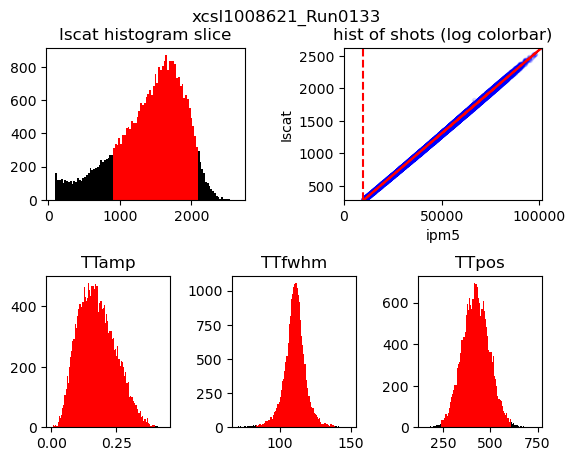

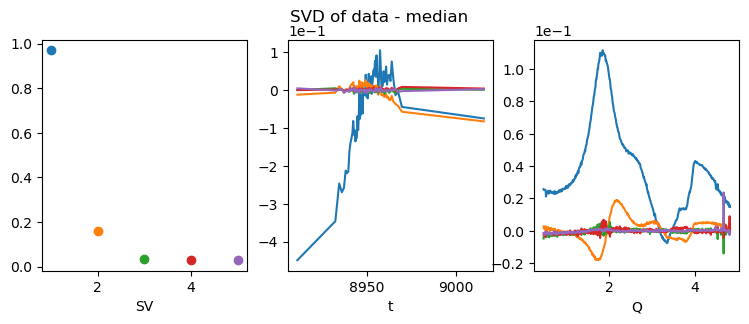

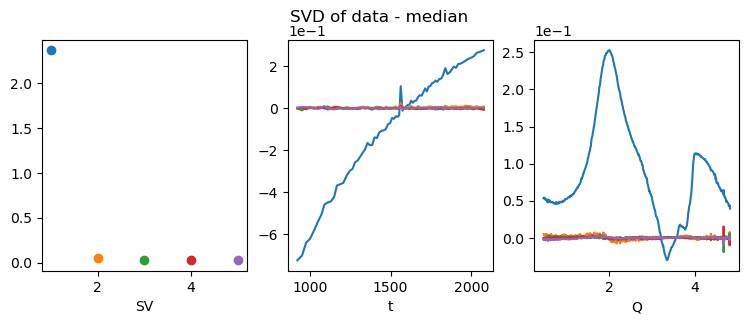

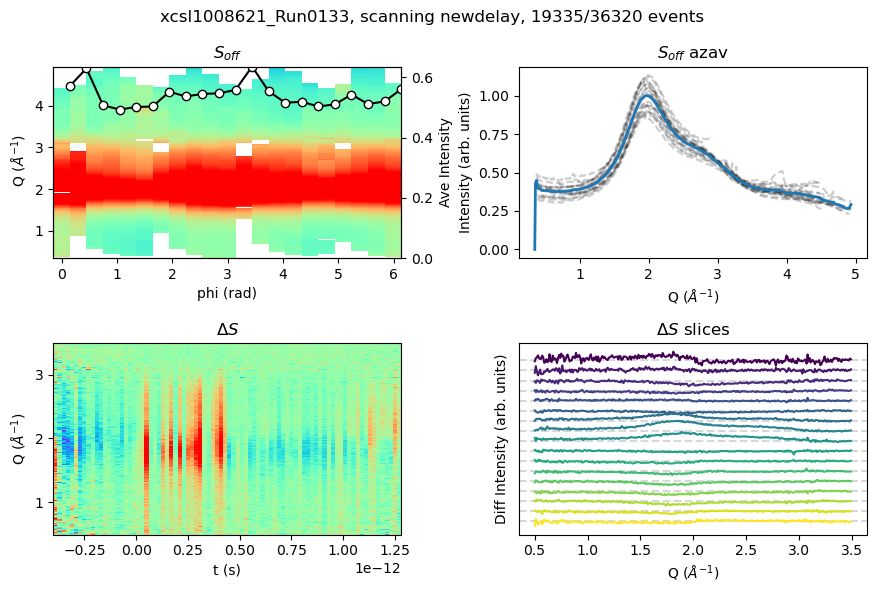

In [4]:
# runs=[133, 134, 135]
runs=[133]


ReduceData(smalldata_folder,exper,runs,outpath,paramDict,varDict)
    

# Stack Runs 

/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/GeneralTools.py:93: RuntimeWarning: Mean of empty slice
  C[np.nonzero(np.isnan(np.nanmean(W*A,axis=axis)))]=np.nan #nansum of nan returns 0 so fix that
/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/GeneralTools.py:96: RuntimeWarning: divide by zero encountered in divide
  Cerr=1/np.sqrt(temp)


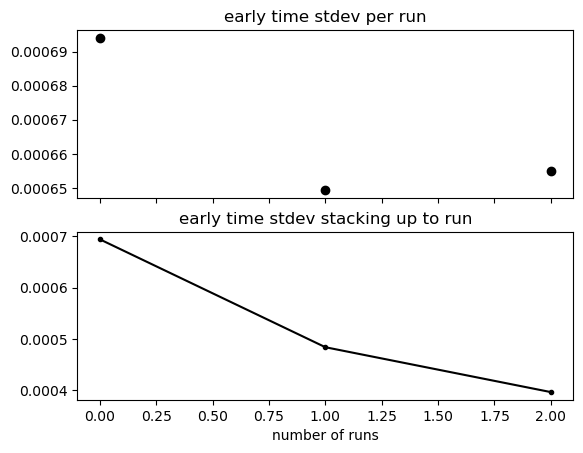

In [2]:
runpath=outpath+'npy/'
runs2=[133, 134, 135]

stackDict, estat=Stack_eData(runpath,exper,runs2,earlyt=(-0.2e-12,0.1e-12))
eData_plot(runs2,estat)

In [3]:
#load variables from stack

print(stackDict.keys())
diff=stackDict['aveData']
ts=stackDict['ts']
qs=stackDict['qs']
phis=stackDict['phis']


dict_keys(['aveData', 'errData', 'ts', 'qs', 'phis', 'runs', 'method'])


In [6]:
#do anisotropy

S0,S0_err,S2,S2_err=S0S2P(diff,phis,shift_n=0,deg=100)

shift is 100 degrees
84


Text(0.5, 0.98, '$\\Delta$S2')

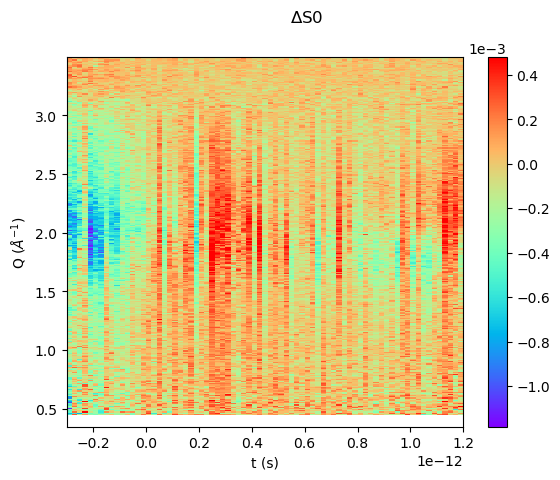

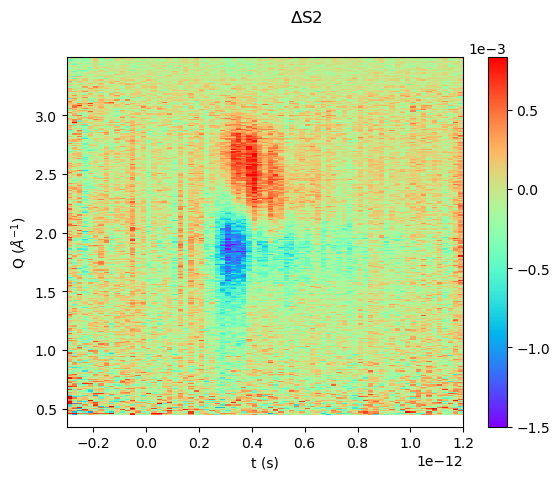

In [7]:
#plot

goodq,qrange=chooseR(0.3,3.5,qs)
goodt,trange=chooseR(-0.3e-12,1.2e-12,ts)


plot_2d(ts[goodt],qs[goodq],S0[goodt,:][:,goodq])
# plt.clim(-2e-4,2e-4)
plt.suptitle('$\Delta$S0')
plot_2d(ts[goodt],qs[goodq],S2[goodt,:][:,goodq])
# plt.clim(-2e-4,2e-4)
plt.suptitle('$\Delta$S2')